# 4.10: Coding Etiquette & Excel Reporting


### Contents:
#### Importing Libs
#### Importing Datasets
#### Data Security
#### Comparing customer behavior in different geographic areas
#### Difference in spending habits between the different U.S. regions
#### Create an exclusion flag for low-activity customers and exclude them from the data
#### Creating profiling variable based on age, income, certain goods, and number of dependents
#### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
#### Compare customer profiles with regions and departments


## Importing Libs

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

## Importing Datasets

In [6]:
# Creating Path
path = r'C:\Users\shyou\3D Objects\My Original Data Sources\Achievement4\March-2023 Instacart Basket Analysis'

In [7]:
# Importing orders_products_customers_merge as ords_prods_all
ords_prods_all = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_customers_merge.pkl'))

In [8]:
# Importing departments_wrangled as dept_df
dept_df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_wrangled.csv'))

## Data Security

##### Based on the regulation of "compliance with customer privacy", we remove the first name and last name columns from the ords_prods_all dataset.

In [9]:
# Dropping columns
ords_prods_all.drop(['first_name' , 'last_name'] , axis = 1 , inplace = True)

In [10]:
ords_prods_all.shape

(32404859, 29)

In [11]:
ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 29 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   gender                  object  
 2   state                   object  
 3   age                     int64   
 4   date_joined             object  
 5   num_of_dependants       int64   
 6   fam_status              object  
 7   income                  int64   
 8   product_id              int64   
 9   department_id           int64   
 10  prices                  float64 
 11  order_id                int64   
 12  order_number            int64   
 13  order_day_of_week       int64   
 14  order_hour_of_day       int64   
 15  days_since_prior_order  float64 
 16  reordered               int64   
 17  price_range_loc         object  
 18  busiest_day             object  
 19  busiest_days            object  
 20  busiest_period_of_day   object  
 21  max_or

## Comparing customer behavior in different geographic areas

In [13]:
#Checking state column
ords_prods_all['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [54]:
# Defining regions 
Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut', 'New York','Pennsylvania','New Jersey']
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio', 'North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida' ,'Kentucky','Tennessee','Mississippi','Alabama' ,'Oklahoma','Texas','Arkansas','Louisiana']
West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [55]:
# Categorizing states and creating a new  region column
ords_prods_all.loc[ords_prods_all['state'].isin(Northeast), 'region'] = 'Northeast'
ords_prods_all.loc[ords_prods_all['state'].isin(Midwest), 'region'] = 'Midwest'
ords_prods_all.loc[ords_prods_all['state'].isin(South), 'region'] = 'South'
ords_prods_all.loc[ords_prods_all['state'].isin(West), 'region'] = 'West'

In [56]:
ords_prods_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

### Difference in spending habits between the different U.S. regions

In [17]:
# Crosstab
crosstab_spending_habit = pd.crosstab(ords_prods_all['user_spender_flag'], ords_prods_all['region'], dropna = False)

In [18]:
crosstab_spending_habit

region,Midwest,Northeast,South,West
user_spender_flag,,,,
High spender,155932,108180,209481,160271
Low spender,7441393,5614556,10582404,8132642


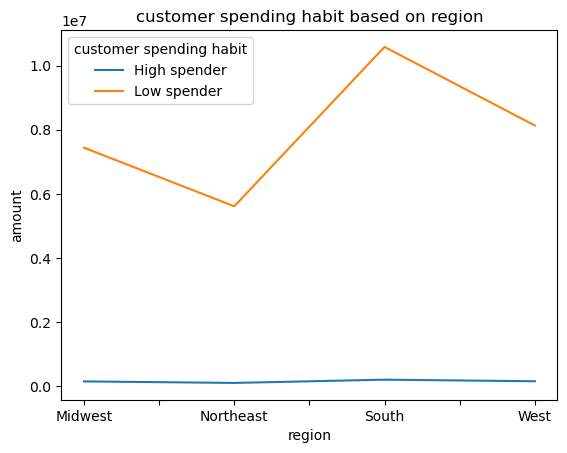

In [186]:
# crosstab_spending_habit line chart
line_crosstab_spending_habit = crosstab_spending_habit.T.plot.line(title = 'customer spending habit based on region', ylabel = 'amount')
plt.legend(title='customer spending habit')


In [213]:
# Exporting plot
line_crosstab_spending_habit.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_crosstab_spending_habit.png'))

##### No significant difference can be seen in the High spender customers in different regions, but in the Low spender customers, the south region has the highest number.

## Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [58]:
# Creating customer_activity_flag column
ords_prods_all.loc[ords_prods_all['max_order'] < 5 , 'customer_activity_flag'] = 'Low activity'
ords_prods_all.loc[ords_prods_all['max_order'] >= 5 , 'customer_activity_flag'] = 'High activity'

In [59]:
ords_prods_all['customer_activity_flag'].value_counts(dropna = False)

High activity    30964564
Low activity      1440295
Name: customer_activity_flag, dtype: int64

In [60]:
low_activity_df = ords_prods_all.loc[ords_prods_all['customer_activity_flag'] == 'Low activity']


In [67]:
low_activity_df.shape

(1440295, 31)

In [ ]:
high_activity_df = ords_prods_all.loc[ords_prods_all['customer_activity_flag'] == 'High activity']


In [18]:
high_activity_df.shape

(30964564, 30)

In [19]:
# Exporting low_activity_df
low_activity_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_df.pkl'))

In [20]:
# Exporting high_activity_df
high_activity_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_df.pkl'))

## Creating profiling variable based on age, income, certain goods, and number of dependents

In [21]:
# Difining high_activity_df as customer_profiling_df
customer_profiling_df = high_activity_df

In [22]:
customer_profiling_df.shape

(30964564, 30)

In [30]:
customer_profiling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404817
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   gender                  object  
 2   state                   object  
 3   age                     int64   
 4   date_joined             object  
 5   num_of_dependants       int64   
 6   fam_status              object  
 7   income                  int64   
 8   product_id              int64   
 9   department_id           int64   
 10  prices                  float64 
 11  order_id                int64   
 12  order_number            int64   
 13  order_day_of_week       int64   
 14  order_hour_of_day       int64   
 15  days_since_prior_order  float64 
 16  reordered               int64   
 17  price_range_loc         object  
 18  busiest_day             object  
 19  busiest_days            object  
 20  busiest_period_of_day   object  
 21  max_or

### Customer Age Profile

In [31]:
customer_profiling_df['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

##### The minimum age is 18 years and the maximum is 81 years. It can be divided into three age groups: young, middle-aged, and old

In [23]:
# Categorize customers based on age 
customer_profiling_df.loc[customer_profiling_df['age'] < 39 , 'age_group_flag'] = 'Young'
customer_profiling_df.loc[(customer_profiling_df['age'] >= 39) & (customer_profiling_df['age'] < 60 ) , 'age_group_flag'] = 'Middle aged'
customer_profiling_df.loc[customer_profiling_df['age'] >= 60  , 'age_group_flag'] = 'Senior'


C:\Users\shyou\AppData\Local\Temp\ipykernel_17500\2935343501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_profiling_df.loc[customer_profiling_df['age'] < 39 , 'age_group_flag'] = 'Young'


In [24]:
customer_profiling_df['age_group_flag'].value_counts(dropna = False)

Senior         10574504
Middle aged    10210198
Young          10179862
Name: age_group_flag, dtype: int64

In [34]:
#crosstab on age_group_flag and user_spender_flag
crosstab_age_spender = pd.crosstab (customer_profiling_df['age_group_flag'], customer_profiling_df['user_spender_flag'], dropna = False)

In [35]:
crosstab_age_spender

user_spender_flag,High spender,Low spender
age_group_flag,,
Middle aged,206743,10003455
Senior,207039,10367465
Young,189502,9990360


##### A small proportion of the Young age group is High spender. While the other two groups are more similar.

### Customer Income Profile

In [36]:
customer_profiling_df['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

##### The minimum income is 25903 USD, and the maximum is 593901 USD. It can be divided into three groups: Low , Middle and High

In [25]:
# Categorize customers based on income
customer_profiling_df.loc[customer_profiling_df['income'] < 60000 , 'income_group_flag'] = 'Low'
customer_profiling_df.loc[(customer_profiling_df['income'] >= 60000) & (customer_profiling_df['income'] < 150000 ) , 'income_group_flag'] = 'Middle'
customer_profiling_df.loc[customer_profiling_df['income'] >= 150000  , 'income_group_flag'] = 'High'


C:\Users\shyou\AppData\Local\Temp\ipykernel_17500\2271714393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_profiling_df.loc[customer_profiling_df['income'] < 60000 , 'income_group_flag'] = 'Low'


In [26]:
customer_profiling_df['income_group_flag'].value_counts(dropna = False)

Middle    21266539
Low        5802750
High       3895275
Name: income_group_flag, dtype: int64

In [39]:
#crosstab on income_group_flag and region
crosstab_income_region = pd.crosstab (customer_profiling_df['region'], customer_profiling_df['income_group_flag'], dropna = False)

In [40]:
crosstab_income_region

income_group_flag,High,Low,Middle
region,,,
Midwest,917495,1341096,5002922
Northeast,677730,1020134,3766821
South,1290460,1965984,7054695
West,1009590,1475536,5442101


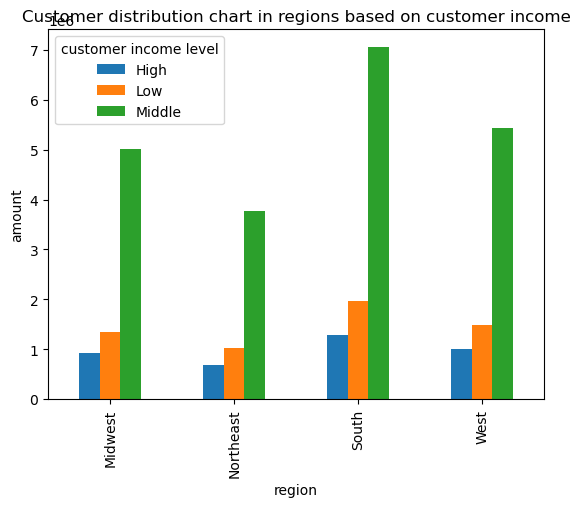

In [182]:
bar_income_region = crosstab_income_region.plot(kind='bar', title = 'Customer distribution chart in regions based on customer income' ,  ylabel = 'amount')
plt.legend(title='customer income level')


##### The south region has the highest figure in all three income groups 

### Customer Number of Dependents Profile

In [42]:
customer_profiling_df['num_of_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: num_of_dependants, dtype: float64

##### The minimum number of dependents is 0, and the maximum is 3. It can be divided into three size groups: Small , Mid and Large

In [27]:
# Categorize customers based on family size
customer_profiling_df.loc[customer_profiling_df['num_of_dependants'] == 0 , 'depen_group_flag'] = 'Small'
customer_profiling_df.loc[(customer_profiling_df['num_of_dependants'] >= 1) & (customer_profiling_df['num_of_dependants'] < 3 ) , 'depen_group_flag'] = 'Mid'
customer_profiling_df.loc[customer_profiling_df['num_of_dependants'] >= 3  , 'depen_group_flag'] = 'Large'

C:\Users\shyou\AppData\Local\Temp\ipykernel_17500\1888431379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_profiling_df.loc[customer_profiling_df['num_of_dependants'] == 0 , 'depen_group_flag'] = 'Small'


In [28]:
customer_profiling_df['depen_group_flag'].value_counts(dropna = False)

Mid      15452367
Large     7772516
Small     7739681
Name: depen_group_flag, dtype: int64

##### Medium-sized families (between 2 and 4 people) have the largest share of customers (Almost half of the customers).

### Customer based on Departments

In [33]:
dept_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [34]:
#renaming unnamed column to department-id 
dept_df.rename(columns= {'Unnamed: 0': 'department_id'}, inplace = True)

In [35]:
dept_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [38]:
customer_profiling_df  = dept_df.merge(customer_profiling_df, on = 'department_id', indicator = False)

In [39]:
customer_profiling_df.shape

(30964564, 34)

In [40]:
department_order_df = customer_profiling_df['department'].value_counts(dropna = False)

In [41]:
department_order_df

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

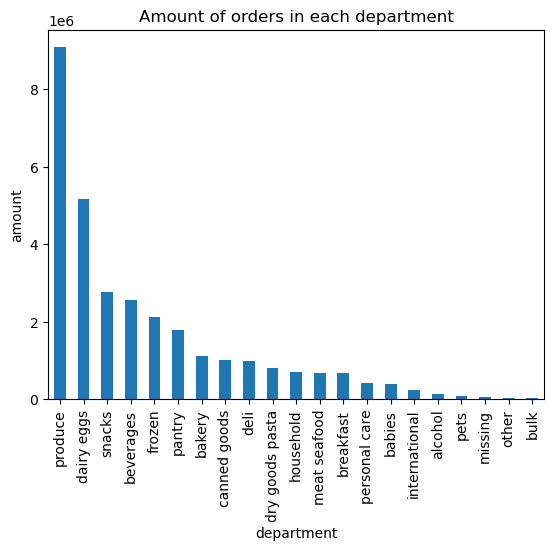

In [211]:
bar_department_order_df = department_order_df.plot(kind='bar', title = 'Amount of orders in each department' ,  ylabel = 'amount' , xlabel = 'department')

In [214]:
# Exporting plot

bar_department_order_df.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_order_df.png'))

##### The highest number of orders are related to the products of departments 'produce' , 'dairy eggs', and 'snacks'

### Create profiling variable based on some certain goods

In [42]:
#creating customer_babies_goog column

customer_profiling_df.loc[customer_profiling_df['department'] !='babies', 'cust_babies'] = 'No'
customer_profiling_df.loc[customer_profiling_df['department'] =='babies', 'cust_babies'] = 'Yes'

In [43]:
customer_profiling_df['cust_babies'].value_counts(dropna = False)

No     30554172
Yes      410392
Name: cust_babies, dtype: int64

Text(0.5, 1.0, 'Share of orders from the babies department from Total')

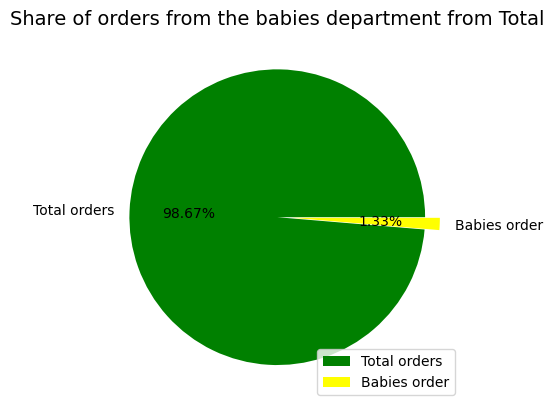

In [212]:
cust_babies_pie = customer_profiling_df['cust_babies'].value_counts().plot.pie(labels = ['Total orders','Babies order'], autopct=('%.2f%%'), colors = ['green', 'yellow'], label = '', explode = [0,0.1])
cust_babies_pie.legend(title = '', loc = 'lower right')
plt.title("Share of orders from the babies department from Total", fontsize = '14')


In [215]:
# Exporting plot

cust_babies_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_babies_pie.png'))

In [44]:
#creating customer_bakery_good column

customer_profiling_df.loc[customer_profiling_df['department'] !='bakery', 'cust_bakery'] = 'No'
customer_profiling_df.loc[customer_profiling_df['department'] =='bakery', 'cust_bakery'] = 'Yes'

In [45]:
customer_profiling_df['cust_bakery'].value_counts(dropna = False)

No     29843736
Yes     1120828
Name: cust_bakery, dtype: int64

Text(0.5, 1.0, 'Share of orders from the bakery department from Total')

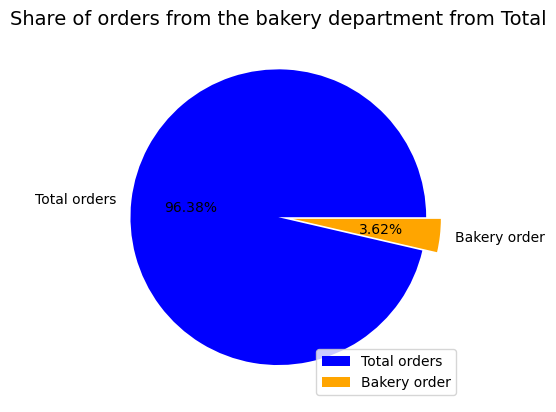

In [136]:
cust_bakery_pie = customer_profiling_df['cust_bakery'].value_counts().plot.pie(labels = ['Total orders','Bakery order'], autopct=('%.2f%%'), colors = ['blue', 'orange'], label = '', explode = [0,0.1])
cust_bakery_pie.legend(title = '', loc = 'lower right')
plt.title("Share of orders from the bakery department from Total", fontsize = '14')


In [216]:
# Exporting plot

cust_bakery_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_bakery_pie.png'))

In [48]:
#creating customer_frozen_good column

customer_profiling_df.loc[customer_profiling_df['department'] !='frozen', 'cust_frozen'] = 'No'
customer_profiling_df.loc[customer_profiling_df['department'] =='frozen', 'cust_frozen'] = 'Yes'

In [49]:
customer_profiling_df['cust_frozen'].value_counts(dropna = False)

No     28842833
Yes     2121731
Name: cust_frozen, dtype: int64

Text(0.5, 1.0, 'Share of orders from the frozen department from Total')

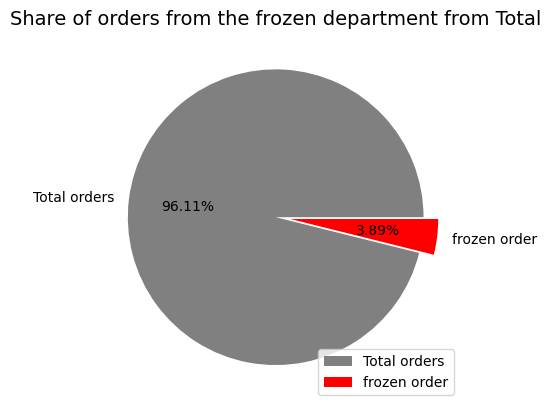

In [225]:
cust_frozen_pie = customer_profiling_df['cust_frozen'].value_counts().plot.pie(labels = ['Total orders','frozen order'], autopct=('%.2f%%'), colors = ['gray', 'red'], label = '', explode = [0,0.1])
cust_frozen_pie.legend(title = '', loc = 'lower right')
plt.title("Share of orders from the frozen department from Total", fontsize = '14')

In [217]:
# Exporting plot

cust_frozen_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_frozen_pie.png'))

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [51]:
# Drop some unusable columns
columns = ['_merge']
customer_profiling_df.drop(columns, inplace=True, axis=1)

In [142]:
customer_profiling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 30964563
Data columns (total 37 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   department_id           int64  
 1   department              object 
 2   user_id                 int64  
 3   gender                  object 
 4   state                   object 
 5   age                     int64  
 6   date_joined             object 
 7   num_of_dependants       int64  
 8   fam_status              object 
 9   income                  int64  
 10  product_id              int64  
 11  prices                  float64
 12  order_id                int64  
 13  order_number            int64  
 14  order_day_of_week       int64  
 15  order_hour_of_day       int64  
 16  days_since_prior_order  float64
 17  reordered               int64  
 18  price_range_loc         object 
 19  busiest_day             object 
 20  busiest_days            object 
 21  busiest_period_of_day   objec

In [226]:
customer_profiling_df.head()

,department_id,department,user_id,gender,state,age,date_joined,num_of_dependants,fam_status,income,...,user_median_order,order_frequency_flag,region,customer_activity_flag,age_group_flag,income_group_flag,depen_group_flag,cust_babies,cust_bakery,cust_frozen
0,1,frozen,33890,Female,New Mexico,36,1/1/2017,0,single,59285,...,26.0,Non-frequent customer,West,High activity,Young,Low,Small,No,No,NaN
1,1,frozen,33890,Female,New Mexico,36,1/1/2017,0,single,59285,...,26.0,Non-frequent customer,West,High activity,Young,Low,Small,No,No,NaN
2,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,7.0,Frequent customer,West,High activity,Young,Middle,Mid,No,No,NaN
3,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,7.0,Frequent customer,West,High activity,Young,Middle,Mid,No,No,NaN
4,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,7.0,Frequent customer,West,High activity,Young,Middle,Mid,No,No,NaN


In [147]:
# calculation of max , mean , min prices based on spending habit
customer_profiling_df.groupby('user_spender_flag').agg({'prices':['max','mean', 'min']})

prices               
                     max      mean  min
user_spender_flag                      
High spender        25.0  8.231512  1.0
Low spender         25.0  7.781900  1.0

In [148]:
# calculation of max , mean , min prices based on age group

customer_profiling_df.groupby('age_group_flag').agg({'prices':['max','mean', 'min']})

prices               
                  max      mean  min
age_group_flag                      
Middle aged      25.0  7.791381  1.0
Senior           25.0  7.795446  1.0
Young            25.0  7.784753  1.0

In [149]:
# calculation of max , mean , min prices based on income

customer_profiling_df.groupby('income_group_flag').agg({'prices':['max','mean', 'min']})

prices               
                     max      mean  min
income_group_flag                      
High                25.0  7.940758  1.0
Low                 25.0  7.083502  1.0
Middle              25.0  7.956055  1.0

In [150]:
# calculation of max , mean , min order based on spending habit

customer_profiling_df.groupby('user_spender_flag').agg({'max_order':['max','mean', 'min']})

max_order               
                        max       mean min
user_spender_flag                         
High spender             99  35.981276   5
Low spender              99  34.394778   5

In [153]:
# calculation of max , mean , min order based on age group

customer_profiling_df.groupby('age_group_flag').agg({'max_order':['max','mean', 'min']})

max_order               
                     max       mean min
age_group_flag                         
Middle aged           99  34.429589   5
Senior                99  34.355863   5
Young                 99  34.494306   5

In [154]:
# calculation of max , mean , min order based on income

customer_profiling_df.groupby('income_group_flag').agg({'max_order':['max','mean', 'min']})

max_order               
                        max       mean min
income_group_flag                         
High                     99  34.845446   5
Low                      99  33.229691   5
Middle                   99  34.675140   5

## Compare customer profiles with regions and departments. 

In [167]:
#crosstab on income_group_flag and region
crosstab_income_region = pd.crosstab (customer_profiling_df['region'], customer_profiling_df['income_group_flag'], dropna = False)

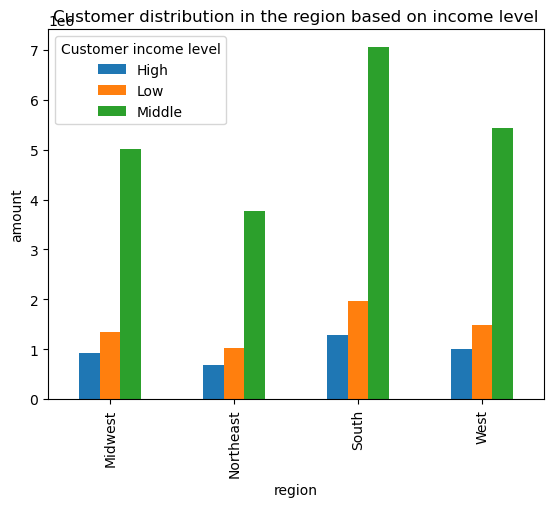

In [174]:
bar_income_region = crosstab_income_region.plot(kind='bar' , title = 'Customer distribution in the region based on income level' , ylabel = 'amount')
plt.legend(title='Customer income level')


In [218]:
# Exporting plot

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region.png'))

In [169]:
crosstab_income_region

income_group_flag,High,Low,Middle
region,,,
Midwest,917495,1341096,5002922
Northeast,677730,1020134,3766821
South,1290460,1965984,7054695
West,1009590,1475536,5442101


In [170]:
#crosstab on age_group_flag and region
crosstab_age_region = pd.crosstab (customer_profiling_df['region'], customer_profiling_df['age_group_flag'], dropna = False)

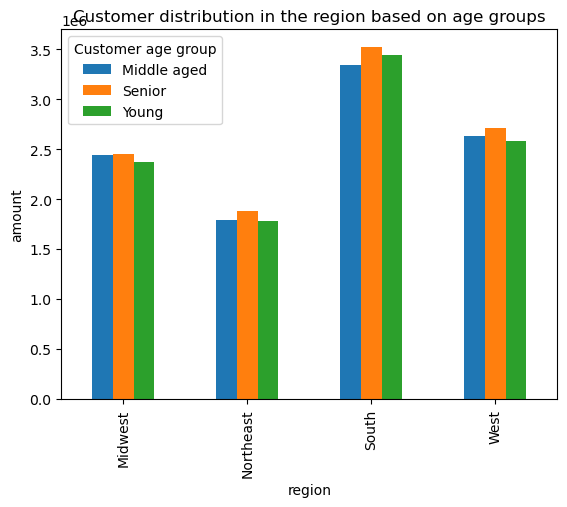

In [175]:
bar_age_region = crosstab_age_region.plot(kind='bar' , title = 'Customer distribution in the region based on age groups' , ylabel = 'amount')
plt.legend(title='Customer age group')


In [219]:
# Exporting plot

bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region.png'))

In [187]:
crosstab_age_region

age_group_flag,Middle aged,Senior,Young
region,,,
Midwest,2438149,2455443,2367921
Northeast,1796040,1884229,1784416
South,3343450,3521421,3446268
West,2632559,2713411,2581257


In [190]:
#crosstab on depen_group_flag and region
crosstab_fam_size_region = pd.crosstab (customer_profiling_df['region'], customer_profiling_df['depen_group_flag'], dropna = False)

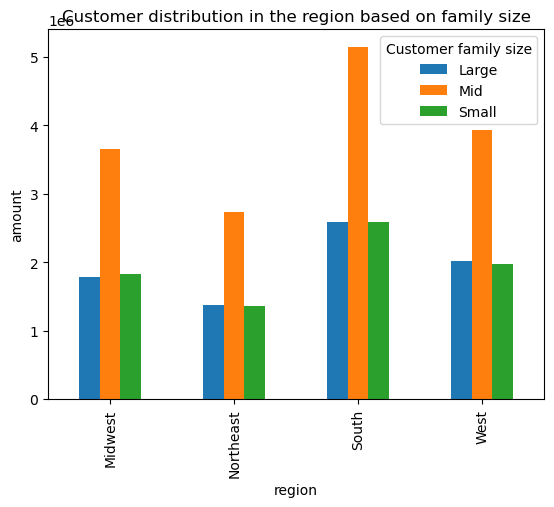

In [191]:
bar_fam_size_region = crosstab_fam_size_region.plot(kind='bar' , title = 'Customer distribution in the region based on family size' , ylabel = 'amount')
plt.legend(title='Customer family size')


In [220]:
# Exporting plot

bar_fam_size_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_size_region.png'))

In [192]:
crosstab_fam_size_region

depen_group_flag,Large,Mid,Small
region,,,
Midwest,1787286,3651411,1822816
Northeast,1381233,2728970,1354482
South,2585864,5143342,2581933
West,2018133,3928644,1980450


##### The south region has the highest rank based on each type of customer profiling, the Northeast region also has the lowest rank.

In [196]:
#crosstab on income_group_flag and department
crosstab_income_department = pd.crosstab (customer_profiling_df['department'], customer_profiling_df['income_group_flag'], dropna = False)

In [ ]:
bar_income_department = crosstab_income_department.plot(kind='bar' , title = 'Customer distribution in the departments based on income' , ylabel = 'amount', color = ['gray' , 'blue' , 'red'])
plt.legend(title='Customer income')

In [221]:
# Exporting plot

bar_income_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_department.png'))

In [199]:
crosstab_income_department

income_group_flag,High,Low,Middle
department,,,
alcohol,24067,28592,91968
babies,53001,57246,300145
bakery,148444,192127,780257
beverages,313379,594583,1663939
breakfast,83422,146969,440459
bulk,3671,7300,22480
canned goods,132414,156173,723487
dairy eggs,659249,902958,3614975
deli,125893,185277,692664


In [201]:
#crosstab on age_group_flag and department
crosstab_age_department = pd.crosstab (customer_profiling_df['department'], customer_profiling_df['age_group_flag'], dropna = False)

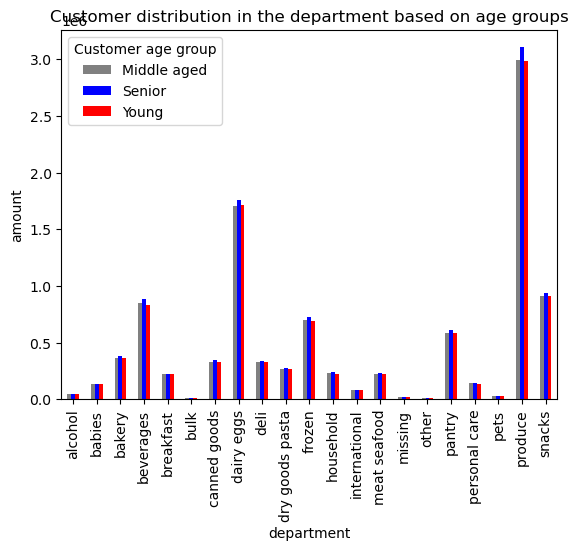

In [208]:
bar_age_department = crosstab_age_department.plot(kind='bar' , title = 'Customer distribution in the department based on age groups' , ylabel = 'amount', color = ['gray' , 'blue' , 'red'])
plt.legend(title='Customer age group')


In [222]:
# Exporting plot

bar_age_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_department.png'))

In [203]:
crosstab_age_department

age_group_flag,Middle aged,Senior,Young
department,,,
alcohol,48078,47596,48953
babies,137830,138738,133824
bakery,369488,382446,368894
beverages,851739,883669,836493
breakfast,221249,227751,221850
bulk,10847,11424,11180
canned goods,334039,344447,333588
dairy eggs,1702954,1762512,1711716
deli,330004,343335,330495


In [204]:
#crosstab on depen_group_flag and region
crosstab_fam_size_department = pd.crosstab (customer_profiling_df['department'], customer_profiling_df['depen_group_flag'], dropna = False)

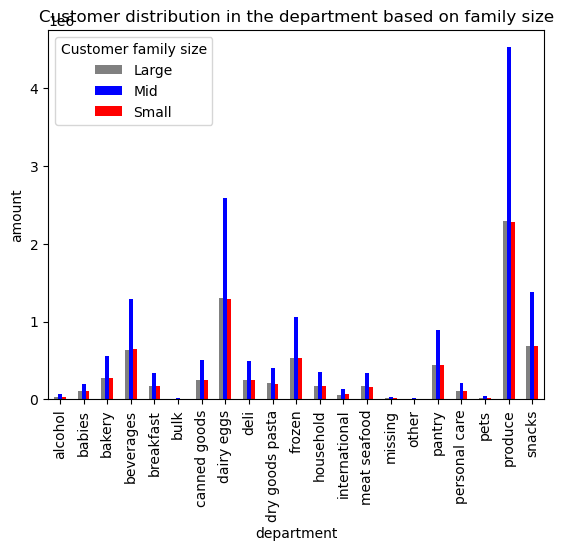

In [209]:
bar_fam_size_department = crosstab_fam_size_department.plot(kind='bar' , title = 'Customer distribution in the department based on family size' , ylabel = 'amount', color = ['gray' , 'blue' , 'red'])
plt.legend(title='Customer family size')

In [223]:
# Exporting plot

bar_fam_size_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_size_department.png'))

In [210]:
crosstab_fam_size_department

depen_group_flag,Large,Mid,Small
department,,,
alcohol,37333,70467,36827
babies,102585,204479,103328
bakery,279822,559611,281395
beverages,640927,1285633,645341
breakfast,167322,337096,166432
bulk,8403,17048,8000
canned goods,255325,505729,251020
dairy eggs,1296264,2586542,1294376
deli,252592,497860,253382


##### The produce department has the highest rank of order based on each type of customer profiling, the bulk department also has the lowest rank of order.

In [52]:
# Exporting customer_profiling_df
customer_profiling_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'customer_profiling_df.pkl'))